<a href="https://colab.research.google.com/github/thuytrangnugget/Algorithm-practice/blob/main/Underfit_in_logistic_regression_D%C6%B0%C6%A1ng_Th%C3%B9y_Trang_AI1502_AIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise:** 

Find example of underfitting in logistic regression

**Work:**

Our aim is to find suitable Lambda and theta to minimize this function:
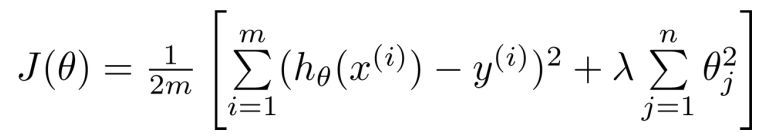



In [10]:
import math
import numpy
import seaborn
import pandas
from sklearn.linear_model import LogisticRegression

In [ ]:
# For showing legends on plots
tp = "true_postive"
tn = "true_negative"
fn = "false_negative"
color_dict = dict({tp:'orange', tn:'green', fn: "red"})

**Correct data**

Let's start with 9 points.

First 4 are positive points (+1) in the positive quadrant.

Last 5 are negative points (-1) in the negative quadrant.

About the plot:
Training data, which is very well separated linearly.



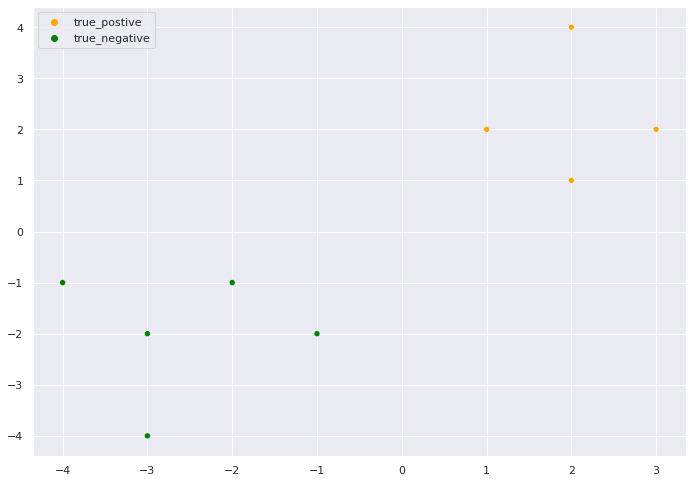

In [ ]:
X = numpy.array([[3, 2], [2, 4], [1, 2], [2, 1], [-2, -1], [-1, -2],[-4, -1], [-3, -2],[-3, -4]])
y = numpy.array([1, 1, 1, 1, -1, -1, -1, -1, -1])

# labels
classification = numpy.array([tp, tp, tp, tp, tn, tn, tn, tn, tn])


print("About the plot:")

print("Training data, which is very well separated linearly.")
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
seaborn.scatterplot(x = X[:, 0] , y = X[:, 1], hue=classification[:], palette = color_dict)
print("")

**Lets create classifiers with different values of regularizers.**

In scikit-learn, C instead of λ notation is used.

Relation between λ and C is: C = 1/λ

For underfitted model C shall be set to small value so that λ will be high.

Lets see how the classifiers with different regularization values (parameter C) fits the perfect linearly separable data.

**Let's add one wrong data point**

The point is in the positive quadrant but labeled as -1.

About the plot:
One wrong data point, the red one.



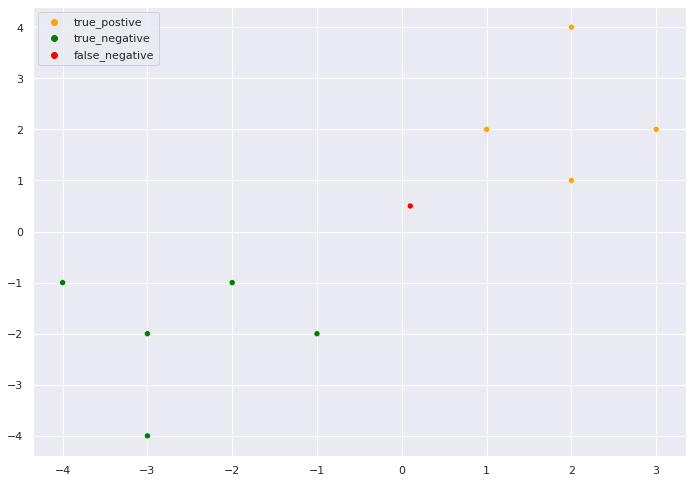

In [ ]:
X = numpy.append(X, [[.1, .5]], axis = 0)
y = numpy.append(y, [-1], axis = 0)
classification = numpy.append(classification, [fn], axis = 0)

print("About the plot:")
print("One wrong data point, the red one.")
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
seaborn.scatterplot(x = X[:, 0] , y = X[:, 1], hue=classification[:], palette = color_dict)
print("")

We expect all query points in positive quadrant shall be classified as +1 and all points in negative quadrant be classified as -1.

We do not expect a classifier to give incorrect results only because of 1 wrong point when 9 other points in training data are correct.

Now lets create new classifiers with the same regularizations but using data having a single wrong point.

In [ ]:
underfit_1 = LogisticRegression(random_state=0, C = 0.001, fit_intercept = False).fit(X, y)
underfit_2 = LogisticRegression(random_state=0, C = 0.0001, fit_intercept = False).fit(X, y)
underfit_3 = LogisticRegression(random_state=0, C = 0.00001, fit_intercept = False).fit(X, y)
classifiers_titles = ["underfit_1", "underfit_2", "underfit_3"]

classifiers = []
classifiers = numpy.append(classifiers, underfit_1)
classifiers = numpy.append(classifiers, underfit_2)
classifiers = numpy.append(classifiers, underfit_3)

df = pandas.DataFrame()
df["Classifier_object"] = classifiers
df["Classifier"] = classifiers_titles

theta_vectors = numpy.empty((0,2))
for x in classifiers:
    theta_vectors = numpy.append(theta_vectors, x.coef_, axis=0)

df["theta0"] = theta_vectors[:,0]
df["theta1"] = theta_vectors[:,1]


Let's check query point 0.1, 0.5 which is expected to be classified as +1

In [ ]:
query_pt = [[0.1, 0.5]]
predictions_probability = numpy.empty((0,2))
predictions = numpy.empty((0,))
for x in classifiers:
    predictions_probability = numpy.append(predictions_probability, x.predict_proba(query_pt), axis=0)
    predictions = numpy.append(predictions, x.predict(query_pt), axis=0)


df["Probability -1"] = predictions_probability[:, 0]
df["Probability +1"] = predictions_probability[:, 1]
df["Predictions"] = predictions
pandas.set_option('display.float_format', lambda x: '%.5f' % x)

print("")
print("Query point = ", query_pt)
df


Query point =  [[0.1, 0.5]]


,Classifier_object,Classifier,theta0,theta1,Probability -1,Probability +1,predictions
0,"LogisticRegression(C=0.001, class_weight=None,...",underfit_1,0.01021,0.00902,0.49862,0.50138,1.00000
1,"LogisticRegression(C=0.0001, class_weight=None...",underfit_2,0.00104,0.00092,0.49986,0.50014,1.00000
2,"LogisticRegression(C=1e-05, class_weight=None,...",underfit_3,0.00010,0.00009,0.49999,0.50001,1.00000


In the above classifier, the model still predicts correct result, but the probability of being wrong is very high (~49%). Therefore it can't be generalized for more complex data in real life.